# 2020 Democratic Twitter Overlap Tutorial

#### By Matt Hodges

This notebook demostrates how you can use anonymized Twitter follower data from [FiveThirtyEight](https://github.com/fivethirtyeight/twitter-overlap) and Python 3 to create Venn diagrams of the 2020 Democratic candidates' followers. In this exercise, we'll visualize the followers of [Joe Biden](https://twitter.com/joebiden), [Bernie Sanders](https://twitter.com/berniesanders), and [Elizabeth Warren](https://twitter.com/ewarren).

## Setup

### Import packages

Pull in the necessary packages. For this tutorial, we're using [matplotlib](https://matplotlib.org/) and [matplotlib-venn](https://pypi.org/project/matplotlib-venn/) for rendering the visualization, and [pandas](https://pandas.pydata.org/) for data analysis.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn3

## Fetch remote data

[FiveThirtyEight](https://github.com/fivethirtyeight/twitter-overlap) has published an anonymized dataset of the nearly 20 million Twitter users who follow 2020 Democratic presidential candidates. This data is presented as newline-delimited signed integers of twitter follower ids. We'll fetch the data for Joe Biden, Bernie Sanders, and Elizabeth Warren, loading the follower ids into pandas DataFrames. Since the data is presented as simple text files without headers, we'll label the column as `account_id`. The data for Bernie Sanders is broken up into two files, so we'll download both, and concatenate the resulting DataFrames.

In [12]:
biden_url = 'https://raw.githubusercontent.com/fivethirtyeight/twitter-overlap/master/accounts/JoeBiden.txt'
biden_df = pd.read_csv(biden_url, header=None, names=['account_id'])

sanders_url_1 = 'https://raw.githubusercontent.com/fivethirtyeight/twitter-overlap/master/accounts/BernieSanders.txt'
sanders_url_2 = 'https://raw.githubusercontent.com/fivethirtyeight/twitter-overlap/master/accounts/BernieSanders_2.txt'

sanders_df = pd.concat(
    [
        pd.read_csv(sanders_url_1, header=None, names=['account_id']),
        pd.read_csv(sanders_url_2, header=None, names=['account_id']),
    ],
)

warren_url = 'https://raw.githubusercontent.com/fivethirtyeight/twitter-overlap/master/accounts/ewarren.txt'
warren_df = pd.read_csv(warren_url, header=None, names=['account_id'])

### Inspect the data

We can get general information about our three dataframes by calling `.info()` on them. We can also preview the DataFrames with `.head()` to make sure they have the structure we expect:

In [13]:
biden_df.info()

sanders_df.info()

warren_df.info()

biden_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558333 entries, 0 to 3558332
Data columns (total 1 columns):
account_id    int64
dtypes: int64(1)
memory usage: 27.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254423 entries, 0 to 4840405
Data columns (total 1 columns):
account_id    int64
dtypes: int64(1)
memory usage: 141.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486101 entries, 0 to 2486100
Data columns (total 1 columns):
account_id    int64
dtypes: int64(1)
memory usage: 19.0 MB


,account_id
0,6713269072466804736
1,-2519946430450237437
2,-2587629838558822392
3,-6493119721573974008
4,-5668400639625920501


## Build the visualization

Now we're ready to build the Venn diagram of Twitter followers. We can pass the `account_id` data columns to the `venn3()` function.

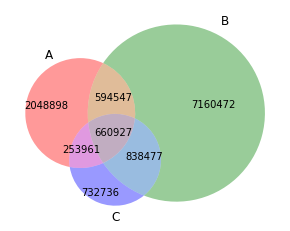

In [14]:
v = venn3(
    [
        set(biden_df.account_id),
        set(sanders_df.account_id),
        set(warren_df.account_id),
    ],
)


From here, we can style our visualization by adding labels and a title.

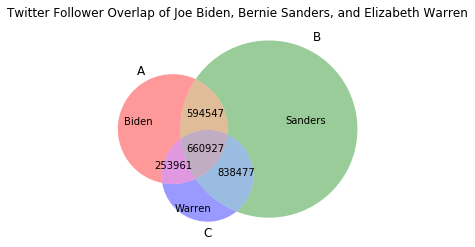

In [15]:
v = venn3(
    [
        set(biden_df.account_id),
        set(sanders_df.account_id),
        set(warren_df.account_id),
    ],
)

# Our Venn object labels can be referenced by bitwise strings indicating the overlap
# We'll label the portions of the circles that don't overlap.
v.get_label_by_id('100').set_text('Biden')
v.get_label_by_id('010').set_text('Sanders')
v.get_label_by_id('001').set_text('Warren')

plt.title("Twitter Follower Overlap of Joe Biden, Bernie Sanders, and Elizabeth Warren")

plt.show()